<h1 align="center"> Data Analysis using Numpy, Matplotlib, and Pandas in Python</h1>
<br/><br/>
![title](resources/python.png)

## Importing the libraries needed
Here we are importing: 
1. Numpy for creating array and numerical calculations
2. Matplotlib for plotting 
3. Seaborn for beautifying the plot
4. Pandas for data analysis

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn
import pandas as pd

# Uncomment the code below to check the available plotting style
#print(plt.style.available)

%matplotlib inline
plt.style.use("fivethirtyeight")
seaborn.set()

## Read excel file

The file is included in this porject, you could find it under resources directory.

In [2]:
sales_data2017 = pd.read_excel("resources/sales_data.xlsx")

## Display the first five rows of sales data  

No matter how many rows your data have, with head method, only the first five rows that will be shown.

In [3]:
sales_data2017.head()

,item,sales_name,qty,unit_price,amount,transaction_date,due_date
0,Laptop,Sales A,20,20,400,2017-04-07,2017-05-07
1,PC,Sales B,30,30,200,2018-02-02,2018-03-04
2,Mouse,Sales C,10,40,400,2017-12-30,2018-01-29
3,Monitor,Sales A,40,10,500,2017-11-02,2017-12-02


## Display the last five rows of sales data

Since the sales data contains only four rows, therefore there is no difference in the output between the first and the last five rows.

In [4]:
sales_data2017.tail()

,item,sales_name,qty,unit_price,amount,transaction_date,due_date
0,Laptop,Sales A,20,20,400,2017-04-07,2017-05-07
1,PC,Sales B,30,30,200,2018-02-02,2018-03-04
2,Mouse,Sales C,10,40,400,2017-12-30,2018-01-29
3,Monitor,Sales A,40,10,500,2017-11-02,2017-12-02


## Summary Statistics of Sales Data

In [5]:
sales_data2017.describe()

,qty,unit_price,amount
count,4.000000,4.000000,4.000000
mean,25.000000,25.000000,375.000000
std,12.909944,12.909944,125.830574
min,10.000000,10.000000,200.000000
25%,17.500000,17.500000,350.000000
50%,25.000000,25.000000,400.000000
75%,32.500000,32.500000,425.000000
max,40.000000,40.000000,500.000000


##  Adding new column and its values

Assuming the transactions in sales data are still outstanding and we'd like to calculate the overdue (in days) of each transaction, the checkOutstanding method below is the solution to get it. The method has one argument i.e. data and in our case is sales_data2017.

In [6]:
from datetime import date

def checkOutstanding(data):
    current_date = date.today()
    due_date = data['due_date']
    overdue = current_date - due_date
    data["overdue"] = overdue
    return data.loc[data.index[0:], ["item","overdue"]]

checkOutstanding(sales_data2017)


,item,overdue
0,Laptop,336 days
1,PC,35 days
2,Mouse,69 days
3,Monitor,127 days


## Plotting with matplotlib

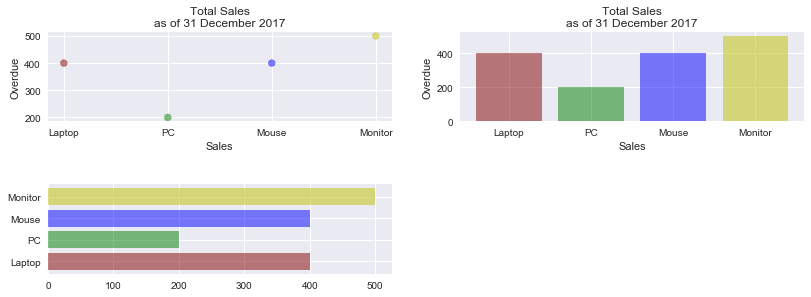

In [13]:
item = sales_data2017['item']
sales = sales_data2017['amount']
overdue = sales_data2017['overdue']
colors = ['maroon','g','b','y']

def scatterPlot(data): 
    plt.title("Total Sales\nas of 31 December 2017")
    plt.xlabel("Sales in $1000")
    plt.ylabel("Items")
    plt.subplot(221)
    return plt.scatter(item, sales, color =colors, alpha=0.5)

def barCharPlot(data):
    plt.title("Total Sales\nas of 31 December 2017")
    plt.xlabel("Sales")
    plt.ylabel("Overdue")
    plt.subplot(222)
    return plt.bar(item, sales, color=colors, alpha=0.5)

def barhPlot(data):
    plt.title("Total Sales\nas of 31 December 2017")
    plt.xlabel("Sales")
    plt.ylabel("Overdue")
    plt.subplot(223)
    return plt.barh(item, sales, color=colors, alpha=0.5)

scatterPlot(sales_data2017)
barCharPlot(sales_data2017)
barhPlot(sales_data2017)

plt.subplots_adjust(top=0.92, bottom=0.08, left=0.75, right=2.5, hspace=0.70, wspace=0.2)

Notes: The idea of the plots above is just to show the matplotlib's subplot feature, they exactly containing the same data.